In [8]:
import tensorflow as tf
from tensorflow import keras
from keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import random

In [107]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

In [108]:
print("Number of training samples: ", len(X_train))
print("Number of testing samples: ", len(X_test))
print("Shape of an image:", X_train[0].shape)

Number of training samples:  60000
Number of testing samples:  10000
Shape of an image: (28, 28)


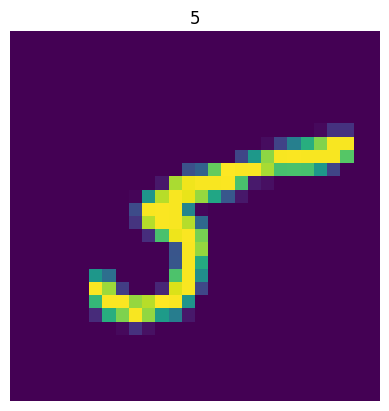

In [109]:
index = random.randint(0, len(X_test) - 1)
plt.imshow(X_train[index])
plt.title(y_train[index])
plt.axis("off")
plt.show()

In [110]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0


In [152]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape = (28, 28, 1)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

c:\Users\Kuugang\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [153]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - accuracy: 0.9005 - loss: 0.3138 - val_accuracy: 0.9869 - val_loss: 0.0395
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9865 - loss: 0.0447 - val_accuracy: 0.9884 - val_loss: 0.0371
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9915 - loss: 0.0278 - val_accuracy: 0.9920 - val_loss: 0.0252
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9940 - loss: 0.0190 - val_accuracy: 0.9891 - val_loss: 0.0346
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9958 - loss: 0.0140 - val_accuracy: 0.9893 - val_loss: 0.0323


In [154]:
loss, accuracy = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9877 - loss: 0.0405


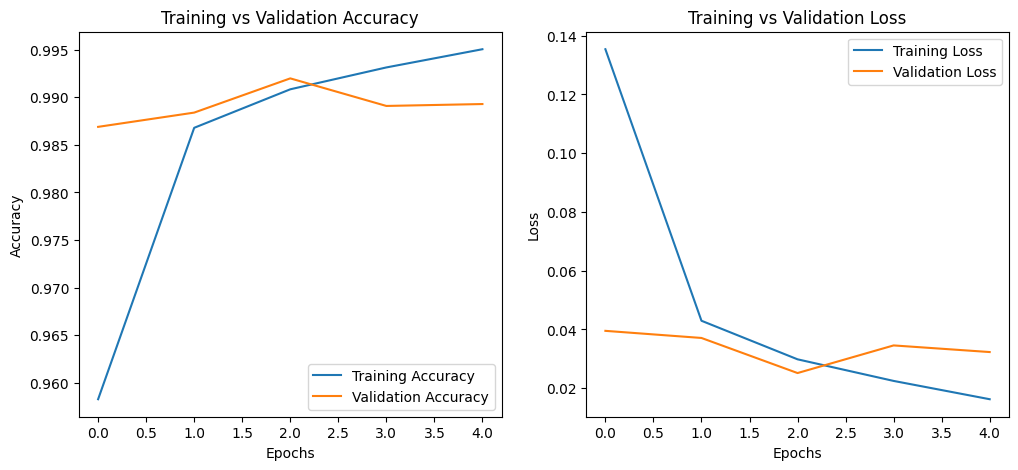

In [155]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')

plt.show()

In [156]:
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis = 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


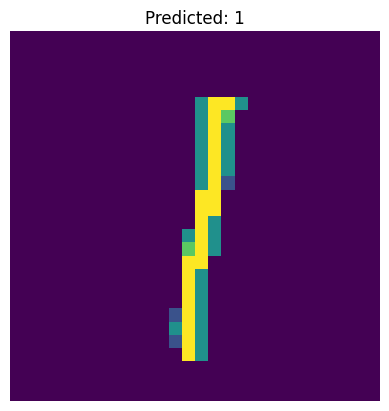

In [160]:
index = random.randint(0, len(X_test) - 1)
plt.imshow(X_test[index])
plt.title(f"Predicted: {predicted_labels[index]}")
plt.axis("off")
plt.show()